**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import random as random
random.seed(9001)
import matplotlib.pyplot as plt
import warnings
from itertools import combinations 
warnings.filterwarnings("ignore")

class linear_regression:
    def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef

    def fit(self, X, y):
        """
        Fit linear model.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array_like, shape (n_samples, n_targets)
            Target values.

        #DISCLAIMER: The inputs X & y must be passed as a DataFrame
        """

        #Initialize Coefficients
        global theta
        theta = np.zeros((X.shape[1]+1,1)) #Initialize theta to the number of features + dummy variable fpr theta 0
        m = X.shape[0] #Initialize the number of elements in the Dataset

        alpha = self.learning_rate #Initialize Learning Rate
        iters = self.iterations #Initialize number of Iterations

        #Feature Normalization
        if (self.normalize == True):
            X_norm = X; 
            mu = np.mean(X_norm) #Compute Mean
            sigma = np.std(X_norm,ddof=1) #Compute Standard Deviation

            #Perform Normalization
            X_norm = (X_norm - mu)/sigma
            X = X_norm     

        #Insert a Dummy variable for Theta 0
        X.insert(0, '', np.ones(X.shape[0]))
        cost = [] #Cost History variable

        #Gradident Descent
        for i in range(0,iters):
            error = np.dot(np.squeeze(np.asarray(X)),theta) - np.array(pd.DataFrame(y))
            cost.append((1/(2*m)) * np.square(error))
            X_temp = np.dot(np.array(error.T),np.array(X))
            theta = theta - (X_temp * (alpha/m)).T
        return theta,cost
    pass

    def predict(self, X):
        """Predict using the linear model
        Parameters
        ----------
        X : array_like, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        C : array, shape (n_samples,)
            Returns predicted values.
        """
        if (self.normalize == True):
            #Feature Normalization
            X_norm = X; 
            mu = np.mean(X_norm) #Compute Mean
            sigma = np.std(X_norm,ddof=1) #Compute Standard Deviation
            #Perform Normalization
            X_norm = (X_norm - mu)/sigma #Normalize
            X = X_norm 

        #Insert a Dummy variable for Theta 0
        X.insert(0,'', np.ones(X.shape[0]))

        coef = np.dot(np.asarray(X),theta)
        return coef
        
    pass

### Importing the Boston Dataset

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target

boston_X = df['RM']
boston_y = pd.DataFrame(df['PRICE'])

## Testing implementation on a 1 dimensional dataset

In [82]:
oneD = df[['RM','PRICE']]

In [83]:
#Using the feature RM, which represents number of rooms in a house, to predict the price
oneD = df[['RM','PRICE']]

#Create an instance of class Linear_Regression
lin_reg = linear_regression
model = lin_reg(0.01,1500,normalize=True)

#Train & Test Split
train = oneD.sample(frac=0.70, random_state=0)
test = oneD.drop(train.index)

train_X = train[['RM']]
train_y = pd.DataFrame(train['PRICE'])
test_X = test[['RM']]
test_y = pd.DataFrame(test['PRICE'])

coef, cost = model.fit(train_X,train_y)
predictions = model.predict(test_X)

final_df = pd.DataFrame()
final_df = pd.DataFrame(predictions).reset_index(drop = True)
final_df1 = pd.DataFrame(test_y).reset_index(drop = True)
final_df['Actual'] = final_df1['PRICE']
final_df = final_df.rename(columns={0:"Predict"})
final_df['Sq_Diff'] = np.square(final_df['Actual'] - final_df['Predict'])
MSE = np.sum(final_df['Sq_Diff'])/len(final_df)
print(final_df.head(10))
print("\nThe MSE for the above model:",MSE)

     Predict  Actual    Sq_Diff
0  24.462430    24.0   0.213842
1  19.577888    18.9   0.459533
2  19.620660    18.9   0.519351
3  17.944005    14.5  11.861168
4  16.113371    13.9   4.899010
5  23.778081    18.4  28.923759
6  20.159585    14.5  32.030904
7  19.115953    13.2  34.998496
8  18.183527    20.0   3.299575
9  19.252822    24.7  29.671743

The MSE for the above model: 49.946555682743494


### Testing the same against Scikit Learn

In [6]:
from sklearn.linear_model import LinearRegression

# instantiate, fit & predict
lm2 = LinearRegression()
lm2.fit(train_X, train_y)

# predict for a new observation
final_df['sklearn_Pred'] = lm2.predict(test_X)

#Put the same in a Dataframe for output
final_df['Sq_Diff_sklearn'] = np.square(final_df['Actual'] - final_df['sklearn_Pred'])
MSE = np.sum(final_df['Sq_Diff_sklearn'])/len(final_df)
print(final_df.head(10))
print("\nThe MSE from Sklearn is:",MSE)

     Predict  Actual    Sq_Diff  sklearn_Pred  Sq_Diff_sklearn
0  24.461379    24.0   0.212870     25.041019         1.083721
1  19.577052    18.9   0.458400     20.078959         1.389945
2  19.619822    18.9   0.518144     20.122410         1.494286
3  17.943241    14.5  11.855906     18.419146        15.359707
4  16.112687    13.9   4.895985     16.559460         7.072728
5  23.777060    18.4  28.912772     24.345809        35.352648
6  20.158723    14.5  32.021149     20.669888        38.067515
7  19.115137    13.2  34.988843     19.609693        41.084163
8  18.182752    20.0   3.302390     18.662470         1.788988
9  19.252001    24.7  29.680698     19.748735        24.515027

The MSE from Sklearn is: 49.402477125845444


## Testing implementation on n dimensional dataset

In [7]:
multiD = df

In [8]:
#Create an instance of class Linear_Regression
lin_reg = linear_regression
model = lin_reg(0.01,1500,normalize=True)

#Train & Test Split
train = multiD.sample(frac=0.70, random_state=0)
test = multiD.drop(train.index)

train_X = train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
train_y = pd.DataFrame(train['PRICE'])

test_X = test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
test_y = pd.DataFrame(test['PRICE'])

coef, cost = model.fit(train_X,train_y)
predictions = model.predict(test_X)

final_df = pd.DataFrame()
final_df = pd.DataFrame(predictions).reset_index(drop = True)
final_df1 = pd.DataFrame(test_y).reset_index(drop = True)
final_df['Actual'] = final_df1['PRICE']
final_df = final_df.rename(columns={0:"Predict"})
final_df['Sq_Diff'] = np.square(final_df['Actual'] - final_df['Predict'])
MSE = np.sum(final_df['Sq_Diff'])/len(final_df)
print(final_df.head(10))
print("\nThe MSE for the above model:",MSE)

     Predict  Actual    Sq_Diff
0  29.420354    24.0  29.380232
1  18.644164    18.9   0.065452
2  21.048841    18.9   4.617520
3  14.247039    14.5   0.063989
4  13.416465    13.9   0.233806
5  19.796832    18.4   1.951139
6  18.096802    14.5  12.936985
7   9.404868    13.2  14.403030
8  21.731641    20.0   2.998582
9  22.493026    24.7   4.870736

The MSE for the above model: 24.81261326165304


### Testing the same against Scikit Learn

In [9]:
from sklearn.linear_model import LinearRegression

# instantiate, fit & predict
lm2 = LinearRegression()
lm2.fit(train_X, train_y)

# predict for a new observation
final_df['sklearn_Pred'] = lm2.predict(test_X)

#Put the same in a Dataframe for output
final_df['Sq_Diff_sklearn'] = np.square(final_df['Actual'] - final_df['sklearn_Pred'])
MSE = np.sum(final_df['Sq_Diff_sklearn'])/len(final_df)
print(final_df.head(10))
print("\nThe MSE from Sklearn is:",MSE)

     Predict  Actual    Sq_Diff  sklearn_Pred  Sq_Diff_sklearn
0  29.420354    24.0  29.380232     29.601692        31.378950
1  18.644164    18.9   0.065452     19.375095         0.225715
2  21.048841    18.9   4.617520     21.904876         9.029281
3  14.247039    14.5   0.063989     14.318240         0.033037
4  13.416465    13.9   0.233806     13.843175         0.003229
5  19.796832    18.4   1.951139     19.982648         2.504774
6  18.096802    14.5  12.936985     18.439118        15.516650
7   9.404868    13.2  14.403030      9.455626        14.020339
8  21.731641    20.0   2.998582     22.617710         6.852406
9  22.493026    24.7   4.870736     23.250711         2.100438

The MSE from Sklearn is: 24.54141609099559


## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [10]:
#Create an instance of class Linear_Regression
lin_reg = linear_regression
model = lin_reg(0.01,1000,normalize=True)

#Train & Test Split
train = multiD.sample(frac=0.70, random_state=0)
test = multiD.drop(train.index)

train_X = train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
train_y = pd.DataFrame(train['PRICE'])

test_X = test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
test_y = pd.DataFrame(test['PRICE'])

coef, cost = model.fit(train_X,train_y)
predictions = model.predict(test_X)

final_df = pd.DataFrame()
final_df = pd.DataFrame(predictions).reset_index(drop = True)
final_df1 = pd.DataFrame(test_y).reset_index(drop = True)
final_df['Actual'] = final_df1['PRICE']
final_df = final_df.rename(columns={0:"Predict"})
final_df['Sq_Diff'] = np.square(final_df['Actual'] - final_df['Predict'])
MSE = np.sum(final_df['Sq_Diff'])/len(final_df)
print(final_df.head(10))
print("\nThe MSE for the above model:",MSE)
print("\n The Coefficients are",coef)

     Predict  Actual    Sq_Diff
0  29.420354    24.0  29.380232
1  18.644164    18.9   0.065452
2  21.048841    18.9   4.617520
3  14.247039    14.5   0.063989
4  13.416465    13.9   0.233806
5  19.796832    18.4   1.951139
6  18.096802    14.5  12.936985
7   9.404868    13.2  14.403030
8  21.731641    20.0   2.998582
9  22.493026    24.7   4.870736

The MSE for the above model: 24.81261326165304

 The Coefficients are [[22.35298975]
 [-0.77023571]
 [ 0.51711781]
 [-0.22459182]
 [ 0.36938683]
 [-1.64383473]
 [ 2.91489359]
 [-0.08906462]
 [-2.51027883]
 [ 1.69166066]
 [-1.05438226]
 [-1.87855168]
 [ 0.95352462]
 [-3.42617772]]


## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [11]:
#All column names
choices = data.feature_names

#Empty lists to 
feature = []
score = []

#Defining model to iterate combinations of features over
lin_reg = linear_regression
model = lin_reg(0.01,150,normalize=True)

for r in range(2,14):
    feature_combo = list(combinations(choices, r))
    for i in range(0,len(feature_combo)):   
        print(feature_combo[i])

        #Train & Test Split
        train = df.sample(frac=0.70, random_state=0)
        test = df.drop(train.index)

        train_X = train[list(feature_combo[i])]
        train_y = train['PRICE']
        test_X = test[list(feature_combo[i])]
        test_y = test['PRICE']

        #Fit and Predict
        coeffs = model.fit(train_X,train_y)
        predictions = list(model.predict(test_X))

        final_df = pd.DataFrame()
        final_df = pd.DataFrame(predictions).reset_index(drop = True)
        final_df1 = pd.DataFrame(test_y).reset_index(drop = True)
        final_df['Actual'] = final_df1['PRICE']
        final_df = final_df.rename(columns={0:"Predict"})
        final_df['Sq_Diff'] = np.square(final_df['Actual'] - final_df['Predict'])
        MSE = np.sum(final_df['Sq_Diff'])/len(final_df)
        print(MSE)

        feature.append(feature_combo[i])
        score.append(MSE)

('CRIM', 'ZN')
103.20448847607553
('CRIM', 'INDUS')
101.39247766149306
('CRIM', 'CHAS')
110.62505279833549
('CRIM', 'NOX')
107.05637863567405
('CRIM', 'RM')
77.06227644714768
('CRIM', 'AGE')
106.72717940554115
('CRIM', 'DIS')
113.2489253598302
('CRIM', 'RAD')
111.87219484776692
('CRIM', 'TAX')
107.05378805961165
('CRIM', 'PTRATIO')
97.3435154663267
('CRIM', 'B')
111.64544648480769
('CRIM', 'LSTAT')
79.0718388985372
('ZN', 'INDUS')
102.70395665565435
('ZN', 'CHAS')
110.04132862404693
('ZN', 'NOX')
107.53700524664652
('ZN', 'RM')
80.09595594924131
('ZN', 'AGE')
109.33335843323364
('ZN', 'DIS')
115.12677047819226
('ZN', 'RAD')
107.66258922905186
('ZN', 'TAX')
102.78182319403993
('ZN', 'PTRATIO')
99.13025318765476
('ZN', 'B')
110.55795843106905
('ZN', 'LSTAT')
77.24335284311087
('INDUS', 'CHAS')
102.40925333567759
('INDUS', 'NOX')
105.79479255141143
('INDUS', 'RM')
77.60628063638059
('INDUS', 'AGE')
105.16975558306142
('INDUS', 'DIS')
108.56724159747084
('INDUS', 'RAD')
105.83849865000045


105.4972738679745
('INDUS', 'NOX', 'TAX')
104.50113777364196
('INDUS', 'NOX', 'PTRATIO')
92.98151841218676
('INDUS', 'NOX', 'B')
104.70305431578235
('INDUS', 'NOX', 'LSTAT')
80.12172453324074
('INDUS', 'RM', 'AGE')
76.63235177151049
('INDUS', 'RM', 'DIS')
78.22576762100262
('INDUS', 'RM', 'RAD')
76.23474736069777
('INDUS', 'RM', 'TAX')
76.2134054456947
('INDUS', 'RM', 'PTRATIO')
72.22735299779546
('INDUS', 'RM', 'B')
75.76537943040387
('INDUS', 'RM', 'LSTAT')
67.09872937591547
('INDUS', 'AGE', 'DIS')
105.76453464118205
('INDUS', 'AGE', 'RAD')
104.45411598677622
('INDUS', 'AGE', 'TAX')
103.54945431053329
('INDUS', 'AGE', 'PTRATIO')
93.52704471300494
('INDUS', 'AGE', 'B')
104.14217430002121
('INDUS', 'AGE', 'LSTAT')
79.623107779247
('INDUS', 'DIS', 'RAD')
106.60478864738293
('INDUS', 'DIS', 'TAX')
105.17793732198662
('INDUS', 'DIS', 'PTRATIO')
95.68977189349324
('INDUS', 'DIS', 'B')
106.90910791828313
('INDUS', 'DIS', 'LSTAT')
78.17379196009634
('INDUS', 'RAD', 'TAX')
105.26898031279136


104.53016870665755
('CRIM', 'ZN', 'DIS', 'TAX')
100.70775499065972
('CRIM', 'ZN', 'DIS', 'PTRATIO')
94.1468726755772
('CRIM', 'ZN', 'DIS', 'B')
103.42378667890779
('CRIM', 'ZN', 'DIS', 'LSTAT')
76.565616242803
('CRIM', 'ZN', 'RAD', 'TAX')
101.23766005916457
('CRIM', 'ZN', 'RAD', 'PTRATIO')
94.61458166871934
('CRIM', 'ZN', 'RAD', 'B')
102.53007397347847
('CRIM', 'ZN', 'RAD', 'LSTAT')
77.89151279135852
('CRIM', 'ZN', 'TAX', 'PTRATIO')
92.61898816329338
('CRIM', 'ZN', 'TAX', 'B')
99.5453211988452
('CRIM', 'ZN', 'TAX', 'LSTAT')
77.56676999331431
('CRIM', 'ZN', 'PTRATIO', 'B')
92.2953500165962
('CRIM', 'ZN', 'PTRATIO', 'LSTAT')
70.7186008821783
('CRIM', 'ZN', 'B', 'LSTAT')
77.22013995003616
('CRIM', 'INDUS', 'CHAS', 'NOX')
96.96632864622389
('CRIM', 'INDUS', 'CHAS', 'RM')
71.2592478713628
('CRIM', 'INDUS', 'CHAS', 'AGE')
95.6458659844
('CRIM', 'INDUS', 'CHAS', 'DIS')
98.01984703310973
('CRIM', 'INDUS', 'CHAS', 'RAD')
98.31898296979628
('CRIM', 'INDUS', 'CHAS', 'TAX')
97.79148030120969
('CRI

71.50305290463245
('CRIM', 'DIS', 'B', 'LSTAT')
79.79011020917068
('CRIM', 'RAD', 'TAX', 'PTRATIO')
97.23207209218164
('CRIM', 'RAD', 'TAX', 'B')
107.43010937982122
('CRIM', 'RAD', 'TAX', 'LSTAT')
79.87677681431508
('CRIM', 'RAD', 'PTRATIO', 'B')
97.54539582191619
('CRIM', 'RAD', 'PTRATIO', 'LSTAT')
72.48025943899113
('CRIM', 'RAD', 'B', 'LSTAT')
80.16095062584688
('CRIM', 'TAX', 'PTRATIO', 'B')
95.54347420465166
('CRIM', 'TAX', 'PTRATIO', 'LSTAT')
72.81439654103004
('CRIM', 'TAX', 'B', 'LSTAT')
79.66766585324108
('CRIM', 'PTRATIO', 'B', 'LSTAT')
71.74329250055659
('ZN', 'INDUS', 'CHAS', 'NOX')
97.51869981502642
('ZN', 'INDUS', 'CHAS', 'RM')
73.20023925320535
('ZN', 'INDUS', 'CHAS', 'AGE')
97.1362884577585
('ZN', 'INDUS', 'CHAS', 'DIS')
98.8489526830567
('ZN', 'INDUS', 'CHAS', 'RAD')
96.9568585316188
('ZN', 'INDUS', 'CHAS', 'TAX')
96.05139157520787
('ZN', 'INDUS', 'CHAS', 'PTRATIO')
89.5934909970634
('ZN', 'INDUS', 'CHAS', 'B')
97.2192358227645
('ZN', 'INDUS', 'CHAS', 'LSTAT')
73.99227

('ZN', 'TAX', 'PTRATIO', 'B')
94.37625568603482
('ZN', 'TAX', 'PTRATIO', 'LSTAT')
72.00006411062417
('ZN', 'TAX', 'B', 'LSTAT')
77.89342144619052
('ZN', 'PTRATIO', 'B', 'LSTAT')
71.19744809240109
('INDUS', 'CHAS', 'NOX', 'RM')
74.09009090362592
('INDUS', 'CHAS', 'NOX', 'AGE')
99.59151229036748
('INDUS', 'CHAS', 'NOX', 'DIS')
100.75671365287022
('INDUS', 'CHAS', 'NOX', 'RAD')
100.30381269719958
('INDUS', 'CHAS', 'NOX', 'TAX')
99.6780908019991
('INDUS', 'CHAS', 'NOX', 'PTRATIO')
89.05047350058629
('INDUS', 'CHAS', 'NOX', 'B')
99.88841346284694
('INDUS', 'CHAS', 'NOX', 'LSTAT')
76.55837260838969
('INDUS', 'CHAS', 'RM', 'AGE')
73.36033841155943
('INDUS', 'CHAS', 'RM', 'DIS')
75.23100624044896
('INDUS', 'CHAS', 'RM', 'RAD')
73.34225426201878
('INDUS', 'CHAS', 'RM', 'TAX')
73.52495580324565
('INDUS', 'CHAS', 'RM', 'PTRATIO')
70.00827912654287
('INDUS', 'CHAS', 'RM', 'B')
73.20720040248209
('INDUS', 'CHAS', 'RM', 'LSTAT')
64.7052451952841
('INDUS', 'CHAS', 'AGE', 'DIS')
100.42163846173493
('I

71.8725310234267
('CHAS', 'RM', 'RAD', 'B')
75.1309285072711
('CHAS', 'RM', 'RAD', 'LSTAT')
64.71963976418219
('CHAS', 'RM', 'TAX', 'PTRATIO')
70.74584080882562
('CHAS', 'RM', 'TAX', 'B')
73.76056578578861
('CHAS', 'RM', 'TAX', 'LSTAT')
64.53982840283848
('CHAS', 'RM', 'PTRATIO', 'B')
71.16668083070263
('CHAS', 'RM', 'PTRATIO', 'LSTAT')
60.51260039917196
('CHAS', 'RM', 'B', 'LSTAT')
64.91588328876655
('CHAS', 'AGE', 'DIS', 'RAD')
106.52559810927268
('CHAS', 'AGE', 'DIS', 'TAX')
103.19338143693984
('CHAS', 'AGE', 'DIS', 'PTRATIO')
95.07860767223585
('CHAS', 'AGE', 'DIS', 'B')
108.62684320654434
('CHAS', 'AGE', 'DIS', 'LSTAT')
78.06959264501745
('CHAS', 'AGE', 'RAD', 'TAX')
103.14487624491863
('CHAS', 'AGE', 'RAD', 'PTRATIO')
94.37981794646949
('CHAS', 'AGE', 'RAD', 'B')
105.07282582675509
('CHAS', 'AGE', 'RAD', 'LSTAT')
77.7326972449693
('CHAS', 'AGE', 'TAX', 'PTRATIO')
92.54657845871138
('CHAS', 'AGE', 'TAX', 'B')
102.12816016939053
('CHAS', 'AGE', 'TAX', 'LSTAT')
77.14572716885348
('C

69.97302053938331
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE')
93.08163487980804
('CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS')
93.33905684230939
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RAD')
94.39134580325734
('CRIM', 'ZN', 'INDUS', 'CHAS', 'TAX')
93.85961120350787
('CRIM', 'ZN', 'INDUS', 'CHAS', 'PTRATIO')
86.80522228968805
('CRIM', 'ZN', 'INDUS', 'CHAS', 'B')
93.0914457168352
('CRIM', 'ZN', 'INDUS', 'CHAS', 'LSTAT')
73.99875809930218
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM')
73.79817041355038
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE')
99.2206461866252
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS')
97.44235447292253
('CRIM', 'ZN', 'INDUS', 'NOX', 'RAD')
100.01665995607453
('CRIM', 'ZN', 'INDUS', 'NOX', 'TAX')
99.2672374195447
('CRIM', 'ZN', 'INDUS', 'NOX', 'PTRATIO')
90.43153867713625
('CRIM', 'ZN', 'INDUS', 'NOX', 'B')
98.33667582547693
('CRIM', 'ZN', 'INDUS', 'NOX', 'LSTAT')
78.89869396071929
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE')
72.97174639108613
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS')
72.58592169042599
('CRIM', 'ZN', 'INDU

93.15536266459839
('CRIM', 'ZN', 'DIS', 'TAX', 'B')
100.04149084656801
('CRIM', 'ZN', 'DIS', 'TAX', 'LSTAT')
76.02441908362648
('CRIM', 'ZN', 'DIS', 'PTRATIO', 'B')
93.17044177612247
('CRIM', 'ZN', 'DIS', 'PTRATIO', 'LSTAT')
70.24028071480262
('CRIM', 'ZN', 'DIS', 'B', 'LSTAT')
76.60000995826712
('CRIM', 'ZN', 'RAD', 'TAX', 'PTRATIO')
93.62497052823241
('CRIM', 'ZN', 'RAD', 'TAX', 'B')
100.63581707743627
('CRIM', 'ZN', 'RAD', 'TAX', 'LSTAT')
77.97624771711271
('CRIM', 'ZN', 'RAD', 'PTRATIO', 'B')
93.75280493387766
('CRIM', 'ZN', 'RAD', 'PTRATIO', 'LSTAT')
71.9141142513326
('CRIM', 'ZN', 'RAD', 'B', 'LSTAT')
78.10281297335658
('CRIM', 'ZN', 'TAX', 'PTRATIO', 'B')
92.29645640677826
('CRIM', 'ZN', 'TAX', 'PTRATIO', 'LSTAT')
72.35739791030025
('CRIM', 'ZN', 'TAX', 'B', 'LSTAT')
77.86877931384146
('CRIM', 'ZN', 'PTRATIO', 'B', 'LSTAT')
71.29944775919749
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM')
71.7085552637622
('CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE')
96.35271090657565
('CRIM', 'INDUS', 'CHAS',

101.22689680391778
('CRIM', 'CHAS', 'NOX', 'AGE', 'TAX')
99.58703430373284
('CRIM', 'CHAS', 'NOX', 'AGE', 'PTRATIO')
88.48620639892835
('CRIM', 'CHAS', 'NOX', 'AGE', 'B')
99.88069004653734
('CRIM', 'CHAS', 'NOX', 'AGE', 'LSTAT')
77.83474442910563
('CRIM', 'CHAS', 'NOX', 'DIS', 'RAD')
103.56024495528682
('CRIM', 'CHAS', 'NOX', 'DIS', 'TAX')
101.2269328808228
('CRIM', 'CHAS', 'NOX', 'DIS', 'PTRATIO')
89.66050296008189
('CRIM', 'CHAS', 'NOX', 'DIS', 'B')
102.35201623940065
('CRIM', 'CHAS', 'NOX', 'DIS', 'LSTAT')
76.73542532993055
('CRIM', 'CHAS', 'NOX', 'RAD', 'TAX')
101.93399081365688
('CRIM', 'CHAS', 'NOX', 'RAD', 'PTRATIO')
91.04571782916487
('CRIM', 'CHAS', 'NOX', 'RAD', 'B')
102.49774578252571
('CRIM', 'CHAS', 'NOX', 'RAD', 'LSTAT')
77.98587705502528
('CRIM', 'CHAS', 'NOX', 'TAX', 'PTRATIO')
90.63045314356644
('CRIM', 'CHAS', 'NOX', 'TAX', 'B')
100.64117420005677
('CRIM', 'CHAS', 'NOX', 'TAX', 'LSTAT')
77.68439477938735
('CRIM', 'CHAS', 'NOX', 'PTRATIO', 'B')
89.07882281476238
('CRIM

66.24162523436507
('CRIM', 'RM', 'DIS', 'RAD', 'TAX')
75.96033246684348
('CRIM', 'RM', 'DIS', 'RAD', 'PTRATIO')
71.95357223023589
('CRIM', 'RM', 'DIS', 'RAD', 'B')
75.36402742244653
('CRIM', 'RM', 'DIS', 'RAD', 'LSTAT')
66.39913550067031
('CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO')
71.22930971731341
('CRIM', 'RM', 'DIS', 'TAX', 'B')
74.31744788084
('CRIM', 'RM', 'DIS', 'TAX', 'LSTAT')
65.916911911174
('CRIM', 'RM', 'DIS', 'PTRATIO', 'B')
69.93628554735017
('CRIM', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
61.78395432013452
('CRIM', 'RM', 'DIS', 'B', 'LSTAT')
65.76245450867712
('CRIM', 'RM', 'RAD', 'TAX', 'PTRATIO')
71.4188726059065
('CRIM', 'RM', 'RAD', 'TAX', 'B')
74.52350802556037
('CRIM', 'RM', 'RAD', 'TAX', 'LSTAT')
66.6208795724729
('CRIM', 'RM', 'RAD', 'PTRATIO', 'B')
70.34144155632154
('CRIM', 'RM', 'RAD', 'PTRATIO', 'LSTAT')
62.5113279780591
('CRIM', 'RM', 'RAD', 'B', 'LSTAT')
66.12131354675539
('CRIM', 'RM', 'TAX', 'PTRATIO', 'B')
69.93119290217955
('CRIM', 'RM', 'TAX', 'PTRATIO', 'LSTAT')


93.88655890835707
('ZN', 'INDUS', 'AGE', 'RAD', 'B')
101.52026840384241
('ZN', 'INDUS', 'AGE', 'RAD', 'LSTAT')
79.12870040957739
('ZN', 'INDUS', 'AGE', 'TAX', 'PTRATIO')
93.38178494600338
('ZN', 'INDUS', 'AGE', 'TAX', 'B')
100.45930542338549
('ZN', 'INDUS', 'AGE', 'TAX', 'LSTAT')
78.9907416530665
('ZN', 'INDUS', 'AGE', 'PTRATIO', 'B')
92.4032458856098
('ZN', 'INDUS', 'AGE', 'PTRATIO', 'LSTAT')
72.3385832834788
('ZN', 'INDUS', 'AGE', 'B', 'LSTAT')
78.95732226901566
('ZN', 'INDUS', 'DIS', 'RAD', 'TAX')
100.90048370031508
('ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO')
94.27682680858803
('ZN', 'INDUS', 'DIS', 'RAD', 'B')
101.40681164623756
('ZN', 'INDUS', 'DIS', 'RAD', 'LSTAT')
76.3219964969947
('ZN', 'INDUS', 'DIS', 'TAX', 'PTRATIO')
93.2311076567205
('ZN', 'INDUS', 'DIS', 'TAX', 'B')
99.76593063851186
('ZN', 'INDUS', 'DIS', 'TAX', 'LSTAT')
75.92925453715834
('ZN', 'INDUS', 'DIS', 'PTRATIO', 'B')
92.92866051407616
('ZN', 'INDUS', 'DIS', 'PTRATIO', 'LSTAT')
70.19032938945276
('ZN', 'INDUS', 'DIS

104.86113492335849
('ZN', 'NOX', 'DIS', 'RAD', 'LSTAT')
77.95117890079327
('ZN', 'NOX', 'DIS', 'TAX', 'PTRATIO')
93.01103950901742
('ZN', 'NOX', 'DIS', 'TAX', 'B')
101.78021547222622
('ZN', 'NOX', 'DIS', 'TAX', 'LSTAT')
76.85372254399734
('ZN', 'NOX', 'DIS', 'PTRATIO', 'B')
92.84571987070069
('ZN', 'NOX', 'DIS', 'PTRATIO', 'LSTAT')
70.28671574302187
('ZN', 'NOX', 'DIS', 'B', 'LSTAT')
77.95547705931386
('ZN', 'NOX', 'RAD', 'TAX', 'PTRATIO')
94.33684687476114
('ZN', 'NOX', 'RAD', 'TAX', 'B')
102.9500647426939
('ZN', 'NOX', 'RAD', 'TAX', 'LSTAT')
79.52010720075673
('ZN', 'NOX', 'RAD', 'PTRATIO', 'B')
93.99013291166183
('ZN', 'NOX', 'RAD', 'PTRATIO', 'LSTAT')
72.95718379243279
('ZN', 'NOX', 'RAD', 'B', 'LSTAT')
79.83042702432252
('ZN', 'NOX', 'TAX', 'PTRATIO', 'B')
93.0323559491069
('ZN', 'NOX', 'TAX', 'PTRATIO', 'LSTAT')
73.25456534053237
('ZN', 'NOX', 'TAX', 'B', 'LSTAT')
79.28599017265353
('ZN', 'NOX', 'PTRATIO', 'B', 'LSTAT')
72.35182058173552
('ZN', 'RM', 'AGE', 'DIS', 'RAD')
75.51281

76.75566052836238
('INDUS', 'CHAS', 'AGE', 'PTRATIO', 'B')
89.51918700246762
('INDUS', 'CHAS', 'AGE', 'PTRATIO', 'LSTAT')
69.7977758172409
('INDUS', 'CHAS', 'AGE', 'B', 'LSTAT')
76.68434497107573
('INDUS', 'CHAS', 'DIS', 'RAD', 'TAX')
101.11843135176393
('INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO')
92.67961833832004
('INDUS', 'CHAS', 'DIS', 'RAD', 'B')
101.39807135643213
('INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT')
75.14609989885582
('INDUS', 'CHAS', 'DIS', 'TAX', 'PTRATIO')
92.14113921697061
('INDUS', 'CHAS', 'DIS', 'TAX', 'B')
100.33244458295708
('INDUS', 'CHAS', 'DIS', 'TAX', 'LSTAT')
75.1118609825066
('INDUS', 'CHAS', 'DIS', 'PTRATIO', 'B')
91.55573457330293
('INDUS', 'CHAS', 'DIS', 'PTRATIO', 'LSTAT')
68.48246063038182
('INDUS', 'CHAS', 'DIS', 'B', 'LSTAT')
75.4339011112051
('INDUS', 'CHAS', 'RAD', 'TAX', 'PTRATIO')
92.61007581679661
('INDUS', 'CHAS', 'RAD', 'TAX', 'B')
100.51612168875212
('INDUS', 'CHAS', 'RAD', 'TAX', 'LSTAT')
76.5548563092697
('INDUS', 'CHAS', 'RAD', 'PTRATIO', 'B')
9

78.34652367542581
('INDUS', 'DIS', 'PTRATIO', 'B', 'LSTAT')
71.24786767227887
('INDUS', 'RAD', 'TAX', 'PTRATIO', 'B')
95.03956434557138
('INDUS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
73.29519102217014
('INDUS', 'RAD', 'TAX', 'B', 'LSTAT')
79.97704212626137
('INDUS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
72.95919243078069
('INDUS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.48168110258098
('CHAS', 'NOX', 'RM', 'AGE', 'DIS')
75.00729428057379
('CHAS', 'NOX', 'RM', 'AGE', 'RAD')
73.77864543999831
('CHAS', 'NOX', 'RM', 'AGE', 'TAX')
73.33955429416025
('CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO')
68.52620587833955
('CHAS', 'NOX', 'RM', 'AGE', 'B')
73.21914034519492
('CHAS', 'NOX', 'RM', 'AGE', 'LSTAT')
65.95713789172657
('CHAS', 'NOX', 'RM', 'DIS', 'RAD')
74.89131138574591
('CHAS', 'NOX', 'RM', 'DIS', 'TAX')
74.08047679149647
('CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO')
69.25145083431278
('CHAS', 'NOX', 'RM', 'DIS', 'B')
74.64948450760319
('CHAS', 'NOX', 'RM', 'DIS', 'LSTAT')
65.36589076798246
('CHAS', 'NOX', 'RM', 'R

67.52845046498128
('NOX', 'RM', 'DIS', 'RAD', 'TAX')
76.82705869673481
('NOX', 'RM', 'DIS', 'RAD', 'PTRATIO')
71.78018078010507
('NOX', 'RM', 'DIS', 'RAD', 'B')
76.21716099693481
('NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
66.96059147754269
('NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
71.28703867572025
('NOX', 'RM', 'DIS', 'TAX', 'B')
75.3205760277173
('NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
66.47916447729347
('NOX', 'RM', 'DIS', 'PTRATIO', 'B')
69.9847950173868
('NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
61.87804700551599
('NOX', 'RM', 'DIS', 'B', 'LSTAT')
66.66472565281633
('NOX', 'RM', 'RAD', 'TAX', 'PTRATIO')
71.89144968729535
('NOX', 'RM', 'RAD', 'TAX', 'B')
75.70460438799876
('NOX', 'RM', 'RAD', 'TAX', 'LSTAT')
67.63925966232586
('NOX', 'RM', 'RAD', 'PTRATIO', 'B')
70.5702442803365
('NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT')
63.281622706667065
('NOX', 'RM', 'RAD', 'B', 'LSTAT')
67.19618815976669
('NOX', 'RM', 'TAX', 'PTRATIO', 'B')
70.4596119930494
('NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT')
63.4593007801

75.10293358983606
('CRIM', 'ZN', 'INDUS', 'CHAS', 'PTRATIO', 'B')
86.97058429843939
('CRIM', 'ZN', 'INDUS', 'CHAS', 'PTRATIO', 'LSTAT')
69.41535729380517
('CRIM', 'ZN', 'INDUS', 'CHAS', 'B', 'LSTAT')
74.52086369725937
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE')
73.87044843335839
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS')
72.59992367682852
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD')
74.20009875294836
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'TAX')
74.01843700578871
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO')
69.8878003488834
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'B')
72.62841260862965
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'LSTAT')
66.88529372094574
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS')
96.88356719147855
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'RAD')
100.17454896585069
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'TAX')
99.45258489446923
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO')
90.57809353679573
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'B')
98.59521052105092
('CRIM', 'ZN', 'INDUS', 'NO

63.72524793081969
('CRIM', 'ZN', 'CHAS', 'RM', 'TAX', 'PTRATIO')
68.29665934495972
('CRIM', 'ZN', 'CHAS', 'RM', 'TAX', 'B')
69.90795207293225
('CRIM', 'ZN', 'CHAS', 'RM', 'TAX', 'LSTAT')
63.6803115906482
('CRIM', 'ZN', 'CHAS', 'RM', 'PTRATIO', 'B')
67.05642124389067
('CRIM', 'ZN', 'CHAS', 'RM', 'PTRATIO', 'LSTAT')
60.19419889176008
('CRIM', 'ZN', 'CHAS', 'RM', 'B', 'LSTAT')
63.08659878569927
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD')
97.97081864570566
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX')
95.26613928634869
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'PTRATIO')
88.87884594936223
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'B')
97.15544903574465
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'LSTAT')
74.12853786706006
('CRIM', 'ZN', 'CHAS', 'AGE', 'RAD', 'TAX')
96.60886232026655
('CRIM', 'ZN', 'CHAS', 'AGE', 'RAD', 'PTRATIO')
90.07996147804354
('CRIM', 'ZN', 'CHAS', 'AGE', 'RAD', 'B')
97.36445957009678
('CRIM', 'ZN', 'CHAS', 'AGE', 'RAD', 'LSTAT')
75.82189946735635
('CRIM', 'ZN', 'CHAS', 'AGE', 'TAX', 'P

100.16507634104234
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'PTRATIO')
93.28563607995954
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'B')
101.29952891159483
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'LSTAT')
77.3633244656022
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO')
91.6895647309192
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'B')
98.64978554878465
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'LSTAT')
76.37658038960997
('CRIM', 'ZN', 'AGE', 'DIS', 'PTRATIO', 'B')
91.25182973217262
('CRIM', 'ZN', 'AGE', 'DIS', 'PTRATIO', 'LSTAT')
70.55757282884296
('CRIM', 'ZN', 'AGE', 'DIS', 'B', 'LSTAT')
76.98576920198475
('CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'PTRATIO')
92.89847875979608
('CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'B')
100.2178012133367
('CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'LSTAT')
78.84193174625545
('CRIM', 'ZN', 'AGE', 'RAD', 'PTRATIO', 'B')
92.5964761692255
('CRIM', 'ZN', 'AGE', 'RAD', 'PTRATIO', 'LSTAT')
72.71775861942871
('CRIM', 'ZN', 'AGE', 'RAD', 'B', 'LSTAT')
79.05949629983225
('CRIM', 'ZN', 'AGE', 'TAX', 'PTRATIO', 

72.71465974264777
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'LSTAT')
65.69559646476792
('CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX')
75.10639215154727
('CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO')
70.48123622791923
('CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'B')
73.84588387244696
('CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'LSTAT')
67.30943583823024
('CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO')
70.7274201645663
('CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'B')
73.84954473102329
('CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'LSTAT')
67.30313924370819
('CRIM', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'B')
69.00230548776759
('CRIM', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT')
63.13162747507085
('CRIM', 'INDUS', 'NOX', 'RM', 'B', 'LSTAT')
66.5728920402339
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD')
100.7932551318944
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX')
100.0334526813718
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'PTRATIO')
89.33683760794206
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'B')
99.30783468516195
('CRIM', 'INDUS

71.84644575473794
('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT')
64.37714522509718
('CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX')
73.0726329779845
('CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO')
68.45148859736909
('CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'B')
72.16217598898403
('CRIM', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT')
65.21352586177773
('CRIM', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO')
68.5540593505129
('CRIM', 'CHAS', 'NOX', 'RM', 'TAX', 'B')
71.79624628675526
('CRIM', 'CHAS', 'NOX', 'RM', 'TAX', 'LSTAT')
65.11508974632072
('CRIM', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'B')
66.77489564071809
('CRIM', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT')
60.958491148521716
('CRIM', 'CHAS', 'NOX', 'RM', 'B', 'LSTAT')
64.55453448914069
('CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD')
100.97076932532832
('CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX')
99.04172773037806
('CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO')
88.0625975005725
('CRIM', 'CHAS', 'NOX', 'AGE', 'DIS', 'B')
99.81644030973831
('CRIM', 'CHAS', 'NOX', 'AGE'

67.35649301867849
('CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B')
68.51468670289904
('CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT')
62.89769250376828
('CRIM', 'NOX', 'RM', 'AGE', 'B', 'LSTAT')
66.75880171627432
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX')
75.26416679829285
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO')
70.22682928342196
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'B')
74.39606888407825
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
66.41488977322422
('CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
70.02986122973026
('CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'B')
73.73586552373723
('CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
66.01638188474229
('CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B')
68.35164609142167
('CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
61.49817763396527
('CRIM', 'NOX', 'RM', 'DIS', 'B', 'LSTAT')
65.66940295458855
('CRIM', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO')
70.68977476036247
('CRIM', 'NOX', 'RM', 'RAD', 'TAX', 'B')
74.40114411976406
('CRIM', 'NOX', 'RM', 'RAD', 'TAX', 'LSTA

95.36354373795511
('ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO')
87.58333862569067
('ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'B')
96.30659880497483
('ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'LSTAT')
73.39485000405581
('ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'TAX')
97.1969323453525
('ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'PTRATIO')
89.5567086752209
('ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'B')
97.1541004445304
('ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'LSTAT')
76.07264562889277
('ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'PTRATIO')
89.467092387158
('ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'B')
96.37413644546432
('ZN', 'INDUS', 'CHAS', 'NOX', 'TAX', 'LSTAT')
76.03131772311792
('ZN', 'INDUS', 'CHAS', 'NOX', 'PTRATIO', 'B')
88.25586445760426
('ZN', 'INDUS', 'CHAS', 'NOX', 'PTRATIO', 'LSTAT')
69.9641184679038
('ZN', 'INDUS', 'CHAS', 'NOX', 'B', 'LSTAT')
75.97595038957394
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS')
72.50690072393199
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD')
72.01461144562853
('ZN', 'INDUS', 'CHAS', '

73.77293596895989
('ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'LSTAT')
65.99289561543407
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX')
75.19376616397908
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO')
71.70893063179929
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'B')
74.14153161232227
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'LSTAT')
67.18000489256113
('ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO')
71.65844155262698
('ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'B')
73.96910336582978
('ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'LSTAT')
67.12244772484779
('ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B')
70.27340011756692
('ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'LSTAT')
63.308653495116374
('ZN', 'INDUS', 'RM', 'AGE', 'B', 'LSTAT')
66.74713382411204
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX')
74.5673587676376
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO')
71.81595650306683
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'B')
73.77848513096458
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'LSTAT')
65.32047412534597
('ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO'

71.07534759099535
('ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'LSTAT')
64.38978810353635
('ZN', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B')
68.22990450539356
('ZN', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'LSTAT')
60.96145526846732
('ZN', 'CHAS', 'RM', 'AGE', 'B', 'LSTAT')
64.45094222821045
('ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX')
72.85877325262588
('ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO')
70.96115404732844
('ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'B')
72.9427199463884
('ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'LSTAT')
63.564275702267686
('ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO')
69.93381745515941
('ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'B')
71.67511423308304
('ZN', 'CHAS', 'RM', 'DIS', 'TAX', 'LSTAT')
63.046127720781826
('ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B')
70.05167534756464
('ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
60.429162912004756
('ZN', 'CHAS', 'RM', 'DIS', 'B', 'LSTAT')
63.806083377043585
('ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO')
70.09590524663076
('ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'B')
71.765531

65.83785159007009
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO')
70.75765034098077
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B')
72.96774990145191
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT')
65.21445375192476
('ZN', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B')
70.24716592816428
('ZN', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT')
62.138586541957515
('ZN', 'RM', 'AGE', 'DIS', 'B', 'LSTAT')
65.80470106355386
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO')
71.55002038016873
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B')
73.89887150411282
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT')
66.85074105030434
('ZN', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B')
70.49587806026469
('ZN', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT')
63.242116672993475
('ZN', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')
66.48279361957458
('ZN', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B')
70.15960257817241
('ZN', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT')
63.30061826036952
('ZN', 'RM', 'AGE', 'TAX', 'B', 'LSTAT')
66.26889928565117
('ZN', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT')
62.41658142222773


69.01787387501152
('INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
60.43396707139093
('INDUS', 'CHAS', 'RM', 'DIS', 'B', 'LSTAT')
63.93252137701804
('INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO')
70.38417439961366
('INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'B')
72.76661189021816
('INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'LSTAT')
64.97120613017262
('INDUS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B')
69.16501603356807
('INDUS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'LSTAT')
61.41131038041728
('INDUS', 'CHAS', 'RM', 'RAD', 'B', 'LSTAT')
64.47444504985334
('INDUS', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B')
69.25871393249788
('INDUS', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'LSTAT')
61.706997974962405
('INDUS', 'CHAS', 'RM', 'TAX', 'B', 'LSTAT')
64.61435884710534
('INDUS', 'CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT')
60.841440861531375
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX')
98.79738273460015
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO')
90.46063926228355
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B')
98.91572416999311


71.87584146931778
('INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'B')
74.70473579039098
('INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT')
67.53755819762854
('INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B')
70.53838787525596
('INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT')
63.55797491521293
('INDUS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')
66.9977779660877
('INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B')
70.6139498585192
('INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT')
63.71982053847978
('INDUS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT')
66.99964939655088
('INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT')
62.82789620198932
('INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO')
72.31198362692889
('INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B')
75.03661851542358
('INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT')
66.16673059044578
('INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B')
71.06504714387343
('INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
62.401497700677524
('INDUS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT')
65.75874864758093
('INDUS', 'RM', 'DIS'

68.66123422254667
('CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT')
61.46496610186717
('CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')
64.85397006127234
('CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B')
68.45928347455242
('CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT')
61.609774878978236
('CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT')
64.72529779945314
('CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT')
60.78377995393507
('CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO')
71.40562432631741
('CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B')
74.18610149601763
('CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT')
64.5727647725425
('CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B')
70.68755528399085
('CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
61.083525850571384
('CHAS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT')
64.55104942656897
('CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B')
69.96266853021315
('CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
60.94906018265544
('CHAS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT')
64.12507617457099
('CHAS', 'RM', 'DIS', 'PTRAT

71.27359554371223
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX')
71.24137309987219
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO')
67.55001708281357
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'B')
69.97948290445106
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'LSTAT')
64.48974168238351
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS')
92.16541414671615
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD')
95.2221516379903
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX')
94.79009300326913
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO')
86.81444752567516
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'B')
94.01627399670788
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'LSTAT')
75.73437159597457
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD')
93.68192023436876
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX')
92.91639906004431
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO')
85.35923117414946
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'B')
9

73.07960758789078
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'B', 'LSTAT')
79.09029303252657
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'TAX')
97.72312201068095
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'PTRATIO')
89.8319453895137
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'B')
97.45662935423859
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'RAD', 'LSTAT')
76.23485627779777
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'PTRATIO')
89.76786695381551
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'B')
96.57692434997172
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'TAX', 'LSTAT')
75.9674242389018
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'PTRATIO', 'B')
88.33754131040163
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT')
70.10670858364168
('CRIM', 'ZN', 'INDUS', 'NOX', 'DIS', 'B', 'LSTAT')
75.80114871870141
('CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'TAX', 'PTRATIO')
91.68794246693226
('CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'TAX', 'B')
99.0619372254094
('CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'TAX', 'LSTAT')
79.

95.50479777522685
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'LSTAT')
74.23898854021864
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX')
96.88910056824366
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO')
88.94700013214192
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'B')
97.199384995351
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'LSTAT')
76.71569625026738
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO')
88.74405179245514
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'B')
95.85888866269825
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'TAX', 'LSTAT')
76.36087850155631
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'B')
87.39113645883901
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT')
70.2200139896591
('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'B', 'LSTAT')
76.35441431501745
('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX')
96.4208782319349
('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO')
88.81526553259265
('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'B')
97.22455808775817


69.58905288882451
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'B')
72.54178134781141
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
65.26042271302947
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
69.30114021835145
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'TAX', 'B')
71.79179233142699
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
64.78867601889716
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B')
67.77230959422577
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
61.18381497318037
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'B', 'LSTAT')
64.49905814579985
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO')
70.38684730661737
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'B')
73.10193024149486
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'LSTAT')
66.76146654400317
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B')
69.11556740849552
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT')
63.07056855004152
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'B', 'LSTAT')
66.26145559452267
('CRIM', 'ZN', 'NOX'

66.88415857289372
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'B')
70.24087250677276
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT')
63.5109292288083
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX')
72.38065954702834
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO')
68.18922734847597
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'B')
71.23546522892416
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT')
64.95838758985492
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO')
68.535785850571
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'B')
71.3494927537468
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'LSTAT')
65.0383176422433
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'B')
66.92825617176346
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT')
61.22910780266223
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'B', 'LSTAT')
64.38586433441704
('CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD')
96.03339194071063
('CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 

70.7088882787351
('CRIM', 'INDUS', 'CHAS', 'RAD', 'TAX', 'B', 'LSTAT')
76.6448806959586
('CRIM', 'INDUS', 'CHAS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
70.38354294405917
('CRIM', 'INDUS', 'CHAS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.17959625734166
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD')
73.38745136665295
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX')
73.21929508750505
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO')
68.43073252773394
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'B')
71.93093796039886
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT')
65.61782998953626
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX')
74.79560655313146
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO')
70.27769531536856
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'B')
73.56421208715662
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT')
67.37727841134127
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO')
70.5274739444925
('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'B')

78.07856059279437
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
91.05086694149054
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
71.75585659997682
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
77.99843011531269
('CRIM', 'INDUS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
71.04529854104244
('CRIM', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
92.07428851235156
('CRIM', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
73.42511832696653
('CRIM', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
80.08196498260797
('CRIM', 'INDUS', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
73.0610035963161
('CRIM', 'INDUS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.76536661095334
('CRIM', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
92.74530201898307
('CRIM', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
71.58545565329312
('CRIM', 'INDUS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
78.03953098966421
('CRIM', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.28378330457635
('CRIM', 'INDUS', 'D

61.27452425842124
('CRIM', 'CHAS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT')
64.33874852226228
('CRIM', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.65566682598776
('CRIM', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.995148087034366
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')
91.7814797834285
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B')
100.62986000958318
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
76.69404499853601
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
91.6465157932942
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
70.21308373862853
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
77.29068489194542
('CRIM', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
90.71437153628166
('CRIM', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
70.2644033113974
('CRIM', 'CHAS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
76.59958759263354
('CRIM', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
69.79360679742541
('CRIM', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRAT

68.21885346372666
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'B')
71.34709007043122
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT')
63.618116943709815
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX')
72.73700484460225
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO')
69.28445652513959
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'B')
71.8159674221985
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT')
64.97943037251937
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO')
69.3820879209132
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'B')
71.69941202386718
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'LSTAT')
64.95646238637723
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'B')
67.98094695859236
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT')
61.418698481053944
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'B', 'LSTAT')
64.62272705847693
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD')
95.6500283095727
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX')
94.63162551967224

75.67115106310048
('ZN', 'INDUS', 'CHAS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
70.3558809809186
('ZN', 'INDUS', 'CHAS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.90200994432564
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD')
74.35262822986654
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX')
73.93700430492942
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO')
70.16356247562494
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'B')
73.55879015497356
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT')
66.0945124850052
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX')
75.67655021336378
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO')
71.72635533946855
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'B')
74.64480651805877
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT')
67.65802759361104
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO')
71.69934291972083
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'B')
74.3941095340243
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT')
67.476275959313
('ZN', 'IND

70.78270615501745
('ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
93.12172884531374
('ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
73.51654844333594
('ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
79.38482027244576
('ZN', 'INDUS', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
73.29946952719922
('ZN', 'INDUS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.69254275509526
('ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
92.84041731416829
('ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
71.08095652858275
('ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
76.32820135877525
('ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.01155917363337
('ZN', 'INDUS', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.14532996746338
('ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.13620727632522
('ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD')
72.2477196682554
('ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX')
71.44342495026828
('ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO')
6

98.0826100922102
('ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
74.26874611272227
('ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
92.08556200864575
('ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
69.40017082453676
('ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
75.26184695298547
('ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
90.31323676488996
('ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
69.09191142256421
('ZN', 'CHAS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
74.24521359696409
('ZN', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
69.14697783334896
('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
91.14769291861658
('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
70.7866797280589
('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
76.26996872285504
('ZN', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
70.80257925927565
('ZN', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.00458614228386
('ZN', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
92.8260958

65.03711557275165
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX')
73.09054415578558
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO')
68.78225536083195
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B')
72.14402924875453
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
64.06167648548745
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
68.84780243686212
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B')
72.04936191820242
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
64.02352925394273
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B')
67.47445178653611
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
60.01400592919834
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'B', 'LSTAT')
63.848627752883694
('INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO')
69.65639709803968
('INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'B')
72.7075340660467
('INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'LSTAT')
65.37005826742647
('INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B'

73.97420649919226
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT')
66.32532190632202
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO')
70.39993953134905
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B')
73.74683601361558
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT')
66.1484646408511
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B')
68.9646750006083
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT')
61.8648493124638
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT')
65.95900930900335
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO')
71.7509530835861
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B')
75.01316587149671
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT')
67.81303979855723
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B')
70.40839826984445
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT')
63.68639330515201
('INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')
67.30536896665956
('INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B')
70.5277152

90.99657741941145
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B')
101.24034428838573
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
76.80490912609203
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
90.68663652647952
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
69.5566728455213
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
77.47089453082495
('CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
89.93942052817808
('CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
69.63057086917539
('CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
76.73077865412988
('CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
69.1716154671002
('CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
90.98625577552218
('CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
71.31170925308996
('CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
78.35514434886063
('CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.11434426934134
('CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')

94.50420068167061
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'LSTAT')
76.16682671775858
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'B')
86.71906993967882
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT')
70.45212133244024
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'B', 'LSTAT')
75.88538804626894
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX')
93.43040800865387
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO')
86.36481838365685
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'B')
93.22636808515581
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'LSTAT')
73.11335700721868
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO')
86.4900651726795
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'B')
92.59263484327766
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'LSTAT')
72.99222382000227
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'B')
85.17226012165038
('CRIM', 'ZN', 'INDUS', 'CH

67.0000947300236
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B')
68.92686885495047
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT')
63.2642544467678
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'B', 'LSTAT')
66.36774579186374
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX')
72.70356062870935
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO')
69.15786690867235
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'B')
71.66932111849515
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
64.88389316037438
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
69.19212860572073
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'B')
71.41626450311652
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
64.67133623956919
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B')
67.64885198009209
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
61.239195660080036
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'B'

72.87767161644469
('CRIM', 'ZN', 'INDUS', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.54764344519204
('CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
90.46283973741674
('CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
70.597915820397
('CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
75.67877407100447
('CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
70.40519470745973
('CRIM', 'ZN', 'INDUS', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.82795912944641
('CRIM', 'ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
72.76796024728925
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD')
70.46868194628358
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX')
69.81451877904814
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO')
66.19192379429876
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'B')
69.18482076105902
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT')
63.17113128369698
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE',

62.27808677980918
('CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT')
59.45165239400475
('CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B')
67.82812308113895
('CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.0841062882392
('CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT')
63.574673786099275
('CRIM', 'ZN', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.49605668500088
('CRIM', 'ZN', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.869170381543825
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')
89.32421240329268
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B')
95.59885067495539
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
73.90409726823232
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
89.39794861661679
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
69.08092847428637
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
74.55937752603847
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'TAX',

71.13768775381318
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
76.65047521473223
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.17544914691527
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.21570803535842
('CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
72.88998599734856
('CRIM', 'ZN', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.86434246826803
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD')
70.53139722845478
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX')
70.52524616115436
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO')
66.15871852787303
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'B')
69.35095337464013
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT')
63.391676297572666
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX')
71.94290572897265
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO')
67.87480736711734
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM

63.2358625549487
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT')
59.694168630040146
('CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B')
68.14823882582428
('CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.4485349629356
('CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'B', 'LSTAT')
64.3539959001583
('CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.82673933930601
('CRIM', 'INDUS', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.256940327864555
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')
88.67555702849414
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B')
96.20794977635823
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
75.13633751096886
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
87.86903775398935
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
69.02904289181897
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
75.16022444563832
('CRIM', 

62.64432105570892
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
91.13791660727979
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
71.6057146702522
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
78.09404797288033
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.31392352904524
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.80711552454413
('CRIM', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.32065091471833
('CRIM', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.49460553897144
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX')
71.5898683163327
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO')
67.20095056377959
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B')
70.78281191193848
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT')
64.15319463309056
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO')
67.21077597848553
('CRIM', 'CHAS', 'NOX', 'R

62.936973762618415
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
69.03834947462683
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.84386002613919
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
65.54040151850485
('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
61.195963503986725
('CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.42272595607712
('CRIM', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
62.57555889189264
('CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
91.64972711435367
('CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
71.80051599526796
('CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
79.36326411313183
('CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
71.5742428589617
('CRIM', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.9512588417743
('CRIM', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.43324859015715
('CRIM', 'NOX', 'DIS', 'RAD', 'TAX',

61.67454623239162
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')
64.43685365650856
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B')
68.45530878478355
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT')
61.887146803023896
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT')
64.45776249668089
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT')
61.13376579028234
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO')
69.51434214294163
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B')
70.97517668231986
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT')
63.02912317519697
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B')
68.54359134213401
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
60.37453148708085
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT')
62.79739081961014
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B')
68.38781976095575
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX',

62.12204932064054
('ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
64.6977555280788
('ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
61.50025839226102
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
70.6596222189535
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
63.7908905058905
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
66.73026528087902
('ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
63.16415274114215
('ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
63.34412871910233
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
70.35881101337051
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
62.15884955884528
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
64.68422387853603
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
61.64976927069768
('ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.651367600597865
('ZN', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', '

65.4893323342186
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
69.27700999859113
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
62.013561097370115
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
65.35334773782003
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
68.96485264023134
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
61.88351901209734
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
64.83537154524458
('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
61.19897598803331
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
70.34375422034095
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
63.681667775991
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
66.78813412398084
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
63.0183001698646
('ZN', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
63.201970910729855
('ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
69.681471206004

69.21869906217526
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
60.87715108579991
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
63.76744936929805
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.35179566247554
('INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.485322982813614
('INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.38947815361992
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
90.04698108084229
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
69.68775878521633
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
75.73791748738273
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
69.5579910155084
('INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
69.86992918479773
('INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.31534247227883
('INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
69.85803346264724
('INDUS',

70.35786120454958
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT')
64.70918720284425
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B')
66.74051845381535
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT')
61.35145129900854
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'B', 'LSTAT')
64.15507956911196
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX')
70.10237174170634
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO')
66.95958968179556
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B')
69.17594510312915
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT')
62.70249250099237
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO')
67.10717040596543
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B')
69.0480627297137
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT')
62.59024981773777
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'R

87.01267545625042
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'B')
92.54578236863263
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT')
72.98037802495695
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B')
86.411657307569
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT')
68.26291386449334
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
73.1278474077621
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
86.48692996620464
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
68.6599252029629
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
73.03834050024003
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
68.14256746980094
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
87.97223581403291
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
70.69205664435377
('CRIM', 'ZN', 'INDUS',

61.201627400256086
('CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
62.65505743603407
('CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
89.51620529112535
('CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
70.73782221146413
('CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
75.89731335886567
('CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
70.5506910719209
('CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.95170084342887
('CRIM', 'ZN', 'INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
73.07264386738457
('CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.49925235001133
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX')
70.10103183519175
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO')
66.80156797553288
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B')
69.41739949916673
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM',

67.78167265805855
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
61.5263457585861
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
64.24956315711451
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
60.695363968301464
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
69.20544657631164
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
63.29834949574575
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
66.3252538738058
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
62.61052065327315
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
62.97272364276231
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
68.31269975052335
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.44617279220603
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
64.30092356919005
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 

67.49784317325594
('CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.55074176990621
('CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
64.4997704269852
('CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.93884918911674
('CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.339294791283606
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
67.8716822322028
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
60.456671936031455
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
63.29904967478177
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
59.882630963071065
('CRIM', 'INDUS', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.159627834270445
('CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.04435723794233
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
88.17466290914979
('CRIM',

61.266547400299544
('CRIM', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.64276709251467
('CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.50012007158222
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX')
71.03375319377146
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO')
67.81621231436026
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B')
70.25599689507442
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT')
63.29048561554556
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO')
67.80944009764384
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B')
70.02817838379826
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT')
63.11847176559204
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B')
66.60230184091151
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT')
59.89943034994877
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', '

70.60204734676087
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
63.90583747184449
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
66.94244901337653
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
63.26075278840468
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
63.43593304442148
('ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
69.57175226755915
('ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
62.00148404721281
('ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
64.80167683099444
('ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
61.43186960156929
('ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.496144775370844
('ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
63.253287374717104
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
90.63370741183125
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD

69.46164253354513
('INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.24621171427417
('INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
69.2988839178981
('INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
67.95368684101629
('INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
60.73013058995835
('INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
63.62268942976772
('INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.204855692119004
('INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.33555929226465
('INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.496537205287666
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.49580266645255
('INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
69.82432364966228
('INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
69.35028004007309
('INDUS', 'NOX', 

59.847090220826026
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT')
62.17818848367396
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B')
66.21711108897904
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT')
60.01477120011521
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT')
62.12298738521897
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')
59.30374994700964
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B')
67.37126160785438
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.54761605318936
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')
64.09645267353726
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.97455516438437
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.35610022989429
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS'

66.6048273308338
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
60.08878584638373
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
62.392401943130906
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
59.65201411338335
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
59.731455794326095
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.96065169957281
('CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
59.71937812959057
('CRIM', 'ZN', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
69.05977793277782
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
67.78837648367912
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.45898985413951
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
64.31884669554955
('CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO',

62.775458560927866
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
59.74087683309035
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
59.8684835967345
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.46174117125719
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
87.2554940206147
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
68.5975573937002
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
73.77129758954966
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
68.5075943448765
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
68.8146498207187
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
71.1228690936259
('ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
68.56085436059077
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 

67.7032363490027
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')
61.46334579492374
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT')
64.18181989763896
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')
60.85097375858877
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.08897833228502
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
62.88360151362902
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
60.897183901473774
('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
70.41184913052942
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
61.05310260032138
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B')
65.910072566367
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LST

In [12]:
#Writing the results to a csv and reading the same
MSE_Eval = pd.DataFrame(np.asarray(feature))
MSE_Eval['MSE'] = np.asarray(score)
MSE_Eval.to_csv('MSE_Eval.csv',index=False)

In [59]:
MSE_Eval = pd.read_csv('MSE_Eval.csv')

In [80]:
#Finding the index of the least MSE
index = MSE_Eval[(MSE_Eval['MSE'] == np.min(MSE_Eval['MSE']))].reset_index()['index'][0]
print("The least Mean Square Error obtained over 150 iterations:",np.min(MSE_Eval['MSE']))
print("The variables include",MSE_Eval['0'][index])

The least Mean Square Error obtained over 150 iterations: 59.14562072841089
The variables include ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT')


__Note__:
The least value for MSE obtained over 1500 iterations as shown previously is 24.81. However, the final result of the combination of variables that lead to the least MSE seems to depend on factors like number of iterations, learning rate. 

In this case, over 150 iterations, the least MSE that could be obtained was 59.15 using the features mentioned above.

## Problem 1.4 (5 points)

1. __How do you interpret that a variable causes a model's mean square error to increase? (2 points)__
  - Answer: Mean square error gives us an idea of how close the predictions are to the actuals. There can be number of factors that lead to increase in MSE of a model. Some of them are:
      * __Outliers__ - If there are outliers present in handful of variables, they can cause the model to perform poorly by skewing the prediction in the wrong direction.      
      
      * __Autocorrelation__ - Occurs when the instances of a variable are correlated with itself. Presence of this would lead the model to predict something for y(x+n) based on y(x) when no real relationship exists. 
      
      * __Underfitting__ - Not including variables that explain the target variable better in the model will cause an increase in MSE. Basically absence of compleexity needed to explain the data.
      
      * __Scale of features__ - Not normalizing the data may sometimes cause the model to ignore a variable or two just because it is on a smaller scale
  
2. __Why we would want to normalize our variables? (1 point)__
  - Answer:The goal of normalization is to have all the data points on the same scale so that each feature is equally important. This way we do not introduce a bias in the model. 
  
  Ex: Consider age of the house, number of rooms as the features used in a model.Without normalization, the age can range anywhere between 1 to say a 100 and rooms usually tend to range between 1 to say 10. This would be telling the model, one feature is more important the other when it is not the case
  
  
3. __A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)__
  - Answer: The statement is false. As mentioned above, having features in different scales causes addition of unnecessary and inaccurate bias into the model. The weightage of each feature will be predetermined when they are not normalized and may end up ignoring an important feature just because it was on a smaller scale.
  
  Also, the coefficients of the model fitted with and without normalization cannot be the same due to the reasons elucidated above.

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

In [84]:
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """
        
    #Generating 3 random numbers for a, b & c, considering the line 
    #in the form ax+by+c = 0
    a = random.random()*100
    b = random.random()*100
    c = random.random()*100

    #Generating random data points for x1,y1
    x1 = np.random.uniform(100,-100,k0)
    y1 = ((-c-(a*x1))/b) + np.random.randint(10,100,size = k0)

    #Generating random data points for x2,y2
    x2 = np.random.uniform(100,-100,k1)
    y2 = ((-c-(a*x2))/b) - np.random.randint(10,100,size = k1)

    
    #Plotting the same
    fig = plt.figure()
    
    #Enabling 4 quadrant view
    ax = fig.add_subplot(1, 1, 1)
    #Defining the graph
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
   
    plt.plot(x1, y1,'b.',label='Points to the Left')
    plt.plot(x2, y2,'g.',label='Points to the Right')

    x=list(x1) + list(x2)
    x = np.asarray(x)
    y = (-c-(a*x))/b
    plt.plot(x,y,'r-')
    plt.plot(x,y,'r-',label='Separator')
    plt.legend(loc='upper left')
    
    #Join the x1,y1 and x2,y2 into one array to be returned from the function
    temp = pd.DataFrame()
    temp2 = pd.DataFrame()
    temp['x1'] = x1
    temp['x2'] = y1
    temp['y'] = -1

    temp2['x1'] = x2
    temp2['x2'] = y2
    temp2['y'] = 1

    temp = temp.append(temp2)
    X = np.asarray(temp[['x1','x2']])
    Y = np.asarray(temp['y'])
    
    return X,Y

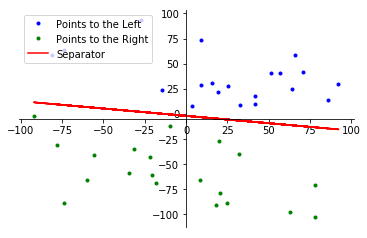

In [85]:
data_x,data_y = generate_dataset(20,20)

## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access to the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



In [88]:
#Function: Given w, returns 2 points on the line (the x & y intercept)
def return_ends(a,b,c):
    #ax + by + c = 0
    #the x intercept
    x_int = (-c/a,0)
    y_int = (0,-c/b)
    return x_int,y_int

In [104]:
def fit_line(x, y):
    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)
    
    Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    
    x = np.append(x,np.asarray(pd.DataFrame(np.ones(len(x)))),axis = 1)

    w = np.random.randint(0,100,3)
    success = 0

    while success < len(x):
        success = 0
        for i in range(0,len(x)):
            if ((w.dot(x[i]) > 0) & (y[i] == 1)):
                success+=1
            elif ((w.dot(x[i]) < 0) & (y[i] == -1)):
                success+=1
            else:
                w = w+(y[i]*x[i])

    #Create a plt object
    fig = plt.figure()

    #Enabling 4 quadrant view
    ax = fig.add_subplot(1, 1, 1)
    #Defining the graph
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')


    #Plot the data points belinging to -1 and 1
    temp = pd.DataFrame(data_x)
    temp = temp.rename(columns={0: "x1", 1: "x2"})
    temp['Y'] = pd.DataFrame(data_y)
    left = temp[(temp['Y']== -1)][['x1','x2']]
    right = temp[(temp['Y'] == 1)][['x1','x2']]

    plt.plot(left['x1'],left['x2'],'b.',label='Points to the Left')
    plt.plot(right['x1'],right['x2'],'g.',label='Points to the Right')
    
    #Plot the line derived from the algorithm
    x1,y1 = return_ends(w[0],w[1],w[2])[0][0],0
    x2,y2 = 0,return_ends(w[0],w[1],w[2])[1][1]

    x_int = []
    y_int = []
    x_int.append(x1)
    x_int.append(x2)

    y_int.append(y1)
    y_int.append(y2)

    #Finding more points on the line so that the line is visible
    rise = (return_ends(w[0],w[1],w[2])[1][1] - return_ends(w[0],w[1],w[2])[1][0])
    run = (return_ends(w[0],w[1],w[2])[0][0] - return_ends(w[0],w[1],w[2])[0][1])
    slope = rise/run
    intercept = return_ends(w[0],w[1],w[2])[1][1]

    #The equation of the line
    #y = mx+b
    y_points = []
    for i in range(-100,100):    
        y_points.append(slope *i + intercept)

    x_points = []
    for i in range(0,len(y_points)): 
        x_points.append((y_points[i] - intercept)/slope)


    plt.plot(x_points,y_points,'r-',label = 'Separator')
    plt.legend(loc='upper left')

    return w

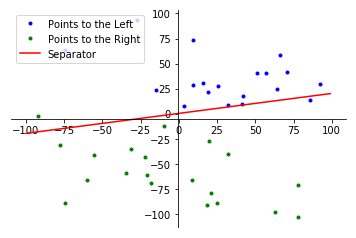

In [105]:
w = fit_line(data_x,data_y)

### Problem 2.3 (10 points)
- __Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)__

Answer: The above algorithm basically implements gradient descent. It converges because it is corrected to move in the right direction until it classifies nearly most of the data points accuratley.
  - The classes -1 and 1, part of target variable y, act as guides for which direction the correction is to be done
  - The data point denoted by x, specifies the magnitude by which the correction is to be made.
  
 Generic batch Gradient Descent algorithm:
  - θi  = θi− α (positive/Negative Number)
  - x here acts as the alpha and y as the positive/negative number
   

- __What happens when the data is not linearly separable? What can be done to salvage the situation?__

Answer: When the data is not linear, it is possible that we end up with a poor classification using this method. One possible solution is to increase the number of degrees to fit a more complex line that explains the data better.
  Alternative solutions include using a different model that is capable of handling more complexity like an SVM or a Decision Tree Classfication